<a href="https://colab.research.google.com/github/TimTree/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [1]:
# TODO

# Imports and CSV reads
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [2]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [3]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [4]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [5]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [6]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [7]:
merged = pd.merge(income, lifespan)
merged.shape

(40437, 4)

In [8]:
merged.duplicated(subset=['geo', 'time']).value_counts()

False    40437
dtype: int64

In [9]:
merged['geo'].nunique()

187

In [10]:
df = pd.merge(merged,population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [11]:
df = pd.merge(df, entities[['country', 'name', 'world_6region']], left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [12]:
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [13]:
df.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
6region          object
dtype: object

In [14]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [15]:
df.describe(exclude='number')

,geo,country_code,country,6region
count,40437,40437,40437,40437
unique,187,187,187,6
top,phl,phl,Zambia,europe_central_asia
freq,219,219,219,10778


In [16]:
usa = df[df['country'] == "United States"]
usa.head()

,geo,year,income,lifespan,population,country_code,country,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,america
38029,usa,1801,2167,39.41,6933517,usa,United States,america
38030,usa,1802,2202,39.41,7067728,usa,United States,america
38031,usa,1803,2166,39.41,7204538,usa,United States,america
38032,usa,1804,2165,39.41,7343995,usa,United States,america


In [17]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [18]:
usa[usa['year'].isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,6region
38046,usa,1818,2258,39.41,9879049,usa,United States,america
38146,usa,1918,9371,47.18,106721812,usa,United States,america
38246,usa,2018,54898,79.14,326766748,usa,United States,america


In [19]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,6region
6854,chn,1818,985,32.00,374161494,chn,China,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,east_asia_pacific


In [62]:
chinaVsUsa = df[df['geo'].str.contains("chn|usa")]
chinaVsUsa.head()

,geo,year,income,lifespan,population,country_code,country,6region
6836,chn,1800,984,32.0,321675013,chn,China,east_asia_pacific
6837,chn,1801,984,32.0,324408862,chn,China,east_asia_pacific
6838,chn,1802,984,32.0,327165946,chn,China,east_asia_pacific
6839,chn,1803,984,32.0,329946461,chn,China,east_asia_pacific
6840,chn,1804,984,32.0,332750607,chn,China,east_asia_pacific


In [63]:
import seaborn as sns

now = df[df['year'] == 2018]
then = df[df['year'] == 1918]
now.head()

,geo,year,income,lifespan,population,country_code,country,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,america


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(483.5453734847516, 100000)

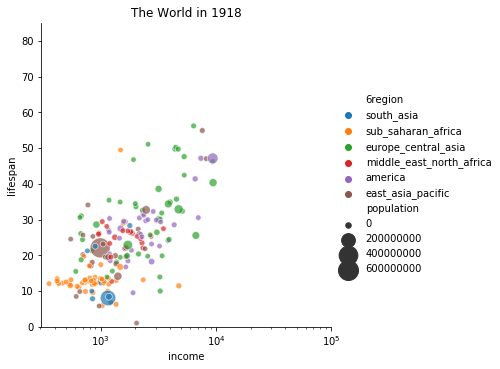

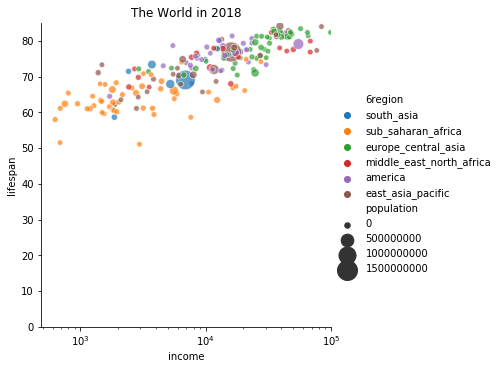

In [67]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title("The World in 1918")
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30,400), alpha=0.7, data=now)
plt.xscale('log')
plt.title("The World in 2018")
plt.ylim(0,85)
plt.xlim(0,100000)

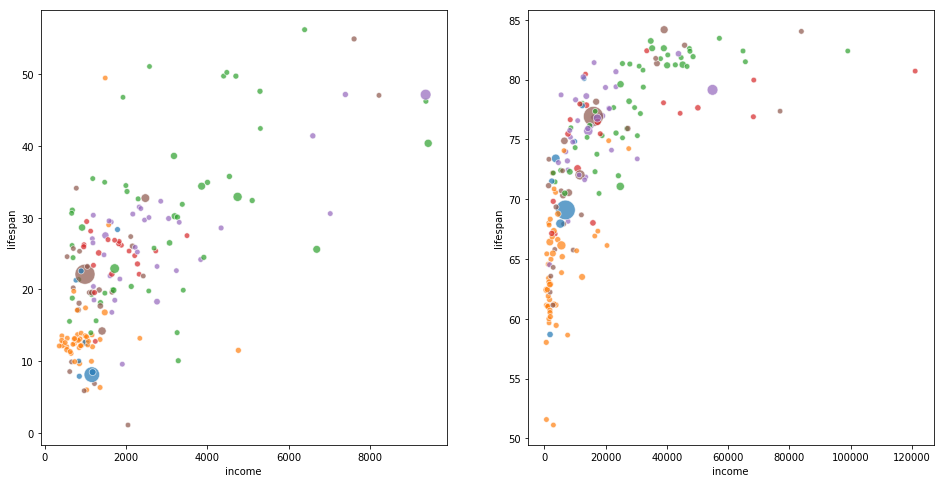

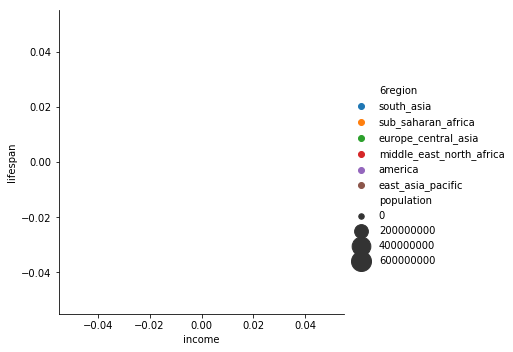

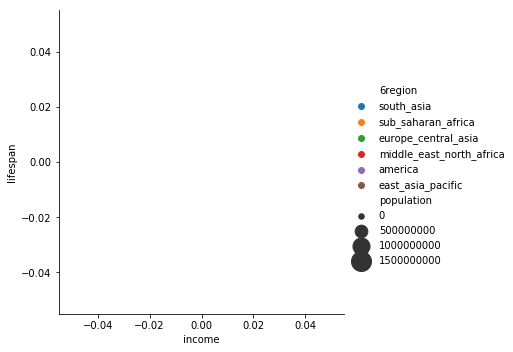

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30,400), alpha=0.7, data=then, ax=ax[0]);
sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30,400), alpha=0.7, data=now, ax=ax[1]);

In [70]:
now.sort_values('income', ascending=False)

,geo,year,income,lifespan,population,country_code,country,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa
22212,lux,2018,99034,82.39,590321,lux,Luxembourg,europe_central_asia
31895,sgp,2018,83888,84.03,5791901,sgp,Singapore,east_asia_pacific
5521,brn,2018,76943,77.36,434076,brn,Brunei,east_asia_pacific
20241,kwt,2018,68359,79.96,4197128,kwt,Kuwait,middle_east_north_africa
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,middle_east_north_africa
16956,irl,2018,65622,81.49,4803748,irl,Ireland,europe_central_asia
27296,nor,2018,64846,82.39,5353363,nor,Norway,europe_central_asia
6616,che,2018,57133,83.45,8544034,che,Switzerland,europe_central_asia
38246,usa,2018,54898,79.14,326766748,usa,United States,america


In [72]:
now_qatar = now[now['country'] == 'Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa


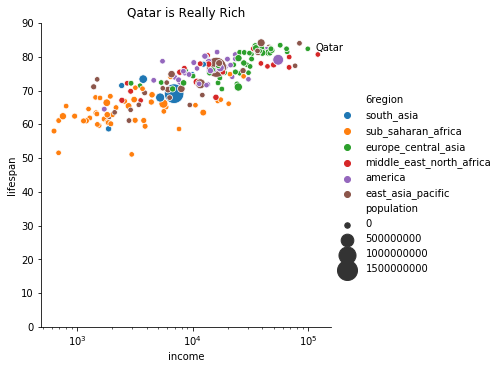

In [73]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is Really Rich")
plt.text(x=now_qatar['income']-5000, y=now_qatar['lifespan']+1, s='Qatar')
plt.show()

In [74]:
years = [1818, 1918, 2018]
centuries = df[df['year'].isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,6region
18,afg,1818,604,28.03,3308390,afg,Afghanistan,south_asia
118,afg,1918,849,7.89,5704092,afg,Afghanistan,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,south_asia
237,ago,1818,668,26.98,1586896,ago,Angola,sub_saharan_africa
337,ago,1918,1174,12.01,3487015,ago,Angola,sub_saharan_africa


Text(0.5, 1.0, 'Healthier and richer in 2018')

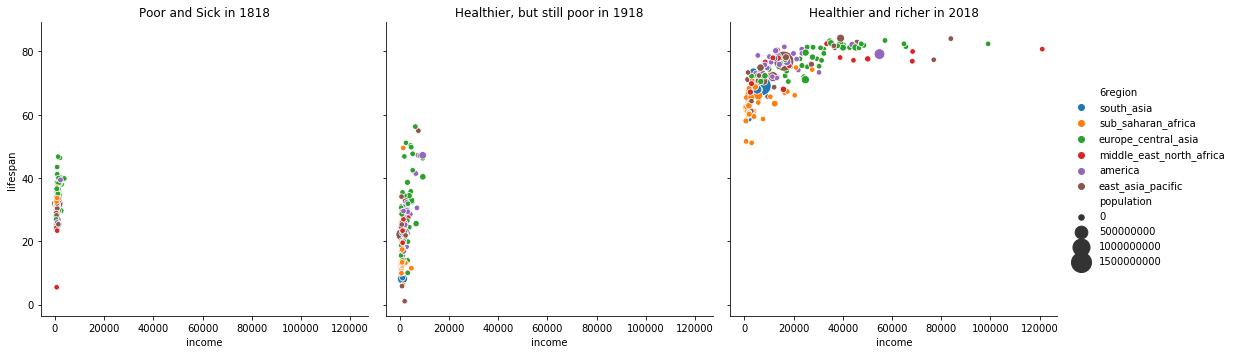

In [82]:
fig=sns.relplot(x='income', y='lifespan', hue='6region', size='population',
            sizes=(30,400), col='year', data=centuries)
axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and richer in 2018')

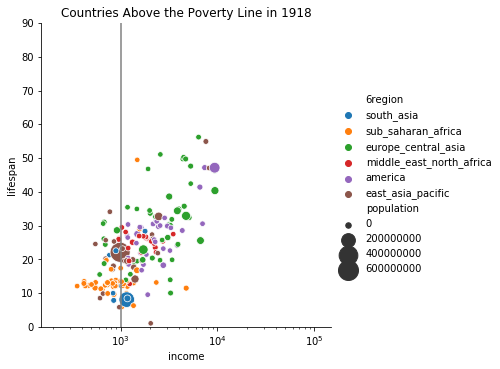

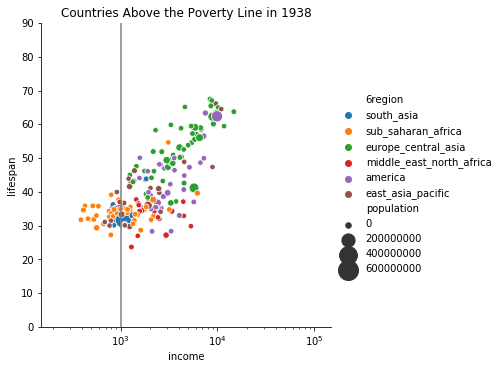

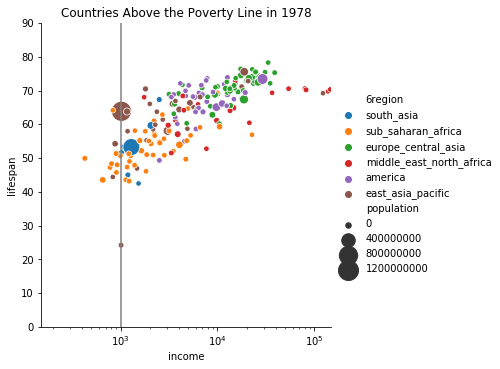

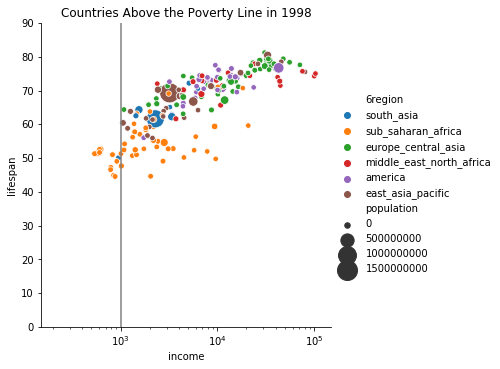

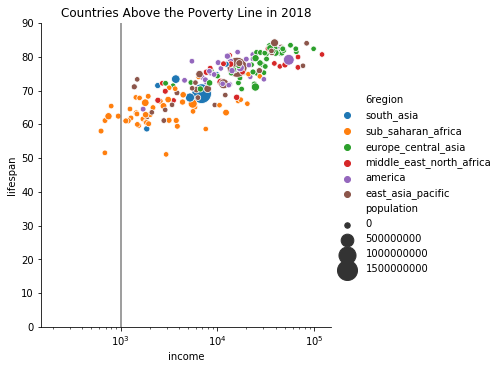

In [83]:
years = [1918,1938,1978,1998,2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries Above the Poverty Line in ' + str(year))
  plt.axvline(x=1000, color='grey')

2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

Text(1810, 1580000000, 'Will India overtake China soon?')

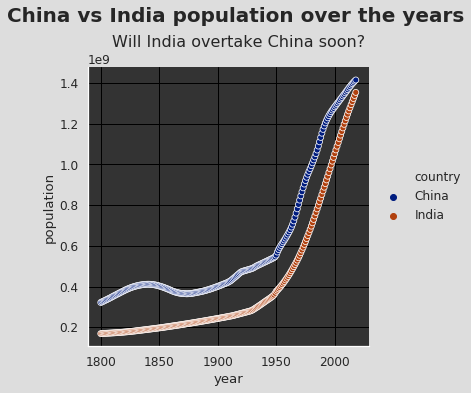

In [128]:
chinaVsIndia = df[df['geo'].str.contains("chn|ind")]
sns.set(style='darkgrid',palette='dark', font_scale=1.1,
        rc={'axes.facecolor':'#333333', 'figure.facecolor':'#dddddd','grid.color': '#000000'})

sns.relplot(x='year', y='population', hue='country', alpha=1, data=chinaVsIndia)
plt.text(x=1720, y=1700000000, s='China vs India population over the years',fontweight='bold', fontsize='20')
plt.text(x=1810, y=1580000000, s='Will India overtake China soon?', fontsize='16')

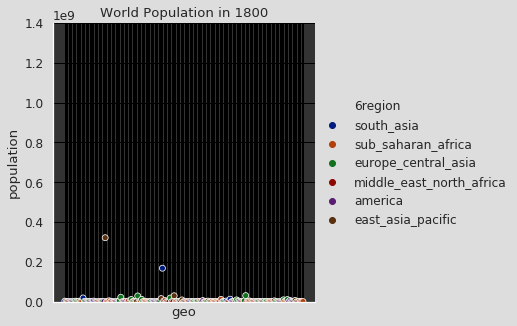

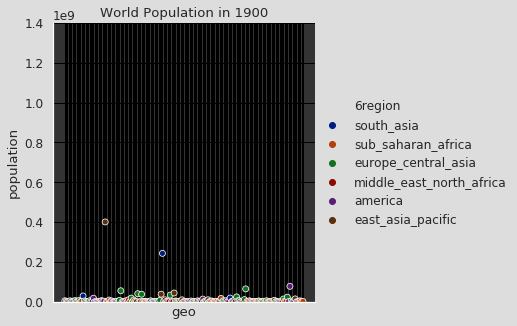

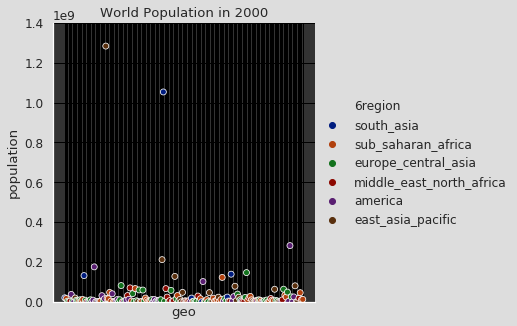

In [146]:
years = [1800,1900,2000]

for year in years:
  sns.relplot(x='geo', y='population', hue='6region',data=df[df.year==year])
  plt.ylim(0,1400000000)
  plt.title("World Population in "+str(year))
  plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)


# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO